In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline
from PIL import Image 


In [2]:
cd /Users/austinmcdonald/Desktop/research/smfi images

/Users/austinmcdonald/Desktop/research/smfi images


In [3]:
os.listdir()

['.DS_Store',
 '1s-sphere-3.tif',
 '7-31-17',
 'AHHH1',
 'CCD pyrene',
 'Futurama-Fry squint.png',
 'IMG_0977_sRGB.JPG',
 'INTO TIRF',
 'single 1st',
 'single1-site1-v2.pdf',
 'single2',
 'single2-site1.pdf',
 'SINGLE3',
 'SMFI-8-1-17-stuff',
 'spher']

In [4]:
im = Image.open('1s-sphere-3.tif')
#im.show()

In [5]:
Imdat = np.array(im)


In [6]:
Imdat

array([[1997, 1993, 1990, ..., 2005, 1997, 2000],
       [1995, 2002, 2003, ..., 1998, 2002, 1994],
       [2000, 1992, 2005, ..., 1994, 2000, 1998],
       ..., 
       [1998, 1998, 2001, ..., 2002, 1997, 1997],
       [2001, 2000, 2006, ..., 2000, 1997, 2004],
       [2005, 1995, 1993, ..., 2002, 1997, 2003]], dtype=uint16)

In [7]:
Imdat.shape

(512, 512)

In [8]:
maxx=[]
for x in range(0,512):
    maxx.append(max(Imdat[x]))
max(maxx)

8437

In [9]:
len(Imdat)

512

In [10]:
scat = np.arange(0,2048)

In [11]:
x=np.arange(64).reshape((8,8))
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [12]:
Row = 1
Col = 1
Xindex = 4 
Yindex = 1


x[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]

eOffset1 = 1999.84
eCoeff1 = 2.20022

array([[ 3,  4,  5],
       [11, 12, 13],
       [19, 20, 21]])

In [32]:
Row = 15
Col = 15
Xindex = 323 
Yindex = 327


Image = Imdat[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]

In [33]:
Image.shape

(31, 31)

In [34]:
Shape = 31
eOffset = 1999.84
eCoeff = 2.20022

eCoeffM = eCoeff*np.ones(Shape**2).reshape((Shape,Shape))
eOffsetM = eOffset*np.ones(Shape**2).reshape((Shape,Shape))

Image = eCoeffM*(Image - eOffsetM)

In [15]:
Image[19]

array([2001, 2005, 2000, 2012, 2008, 2016, 2005, 2024, 2024, 2032, 2036,
       2056, 2080, 2094, 2158, 2304, 2580, 3465, 6348, 8437, 6140, 3416,
       2513, 2286, 2190, 2123, 2102, 2074, 2048, 2024, 2030, 2029, 2018,
       2022, 2010, 2012, 2008, 2016, 2000, 2008, 2008], dtype=uint16)

In [16]:
testx=np.arange(0,41)

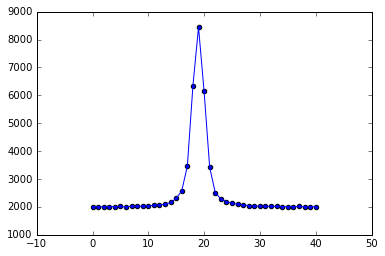

In [17]:
plt.scatter(testx,Image[19])
plt.plot(testx,Image[19])

plt.show()

In [18]:
np.argmax(Image[19])

19

In [19]:
ImageIntensity= Image[19][19:41]
Pixel = (np.arange(19,41)-19)*160e-9

In [20]:
ImageIntensity

array([8437, 6140, 3416, 2513, 2286, 2190, 2123, 2102, 2074, 2048, 2024,
       2030, 2029, 2018, 2022, 2010, 2012, 2008, 2016, 2000, 2008, 2008], dtype=uint16)

In [21]:
Pixel

array([  0.00000000e+00,   1.60000000e-07,   3.20000000e-07,
         4.80000000e-07,   6.40000000e-07,   8.00000000e-07,
         9.60000000e-07,   1.12000000e-06,   1.28000000e-06,
         1.44000000e-06,   1.60000000e-06,   1.76000000e-06,
         1.92000000e-06,   2.08000000e-06,   2.24000000e-06,
         2.40000000e-06,   2.56000000e-06,   2.72000000e-06,
         2.88000000e-06,   3.04000000e-06,   3.20000000e-06,
         3.36000000e-06])

In [22]:
Depth = np.sqrt((220e-9)**2-(Pixel)**2)

In [23]:
Depth

array([  2.20000000e-07,   1.50996689e-07,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan])

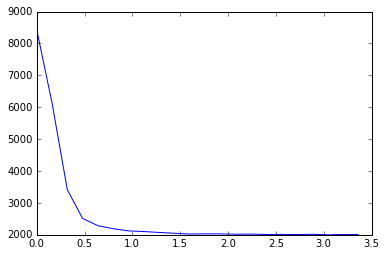

In [24]:
plt.plot(Pixel*1e6,ImageIntensity)

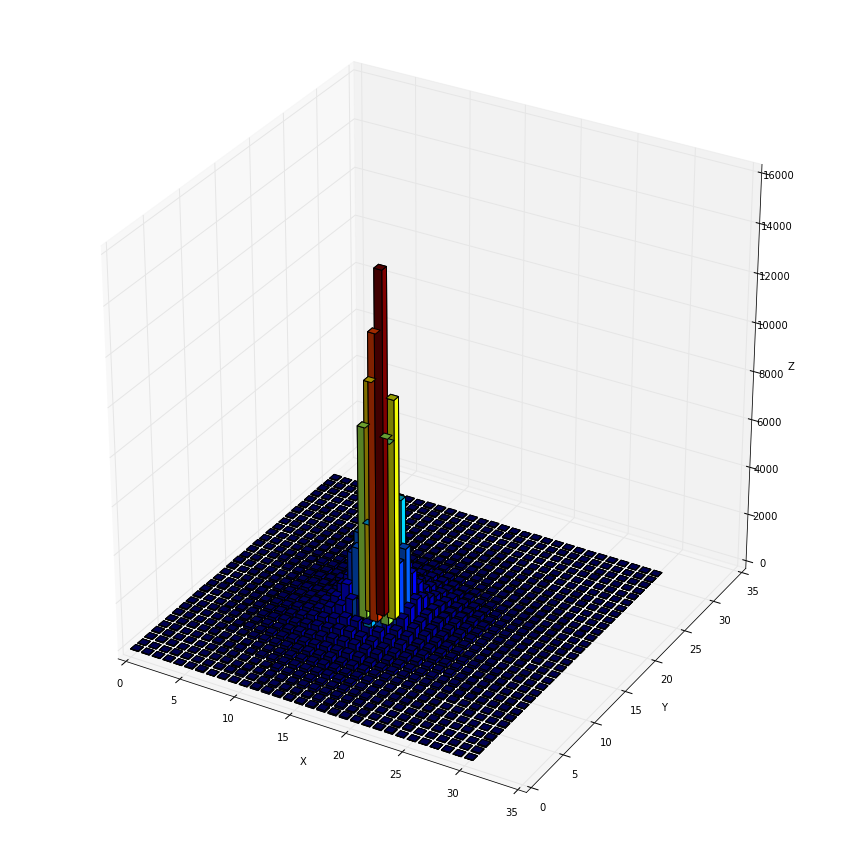

In [35]:
from mpl_toolkits.mplot3d import Axes3D

data = Image


ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()   
ypos = ypos.flatten()
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
ax.bar3d(xpos,ypos,zpos, .7,.7,data.flatten(), color=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.savefig('/Users/austinmcdonald/Desktop/CCD/CCD-image.pdf')

plt.show()

In [37]:
Image.sum()

221526.42242720013